### Problem Statement: 
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. This Case study purpose is to find patterns in the data and ensure that the applicants capable of repaying the loan are not rejected.

### Importing libraries

In [211]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [212]:
application_data = pd.read_csv('application_data.csv')
previous_data =pd.read_csv('previous_application.csv')

In [213]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
## checking the null values
application_data.isna().sum().head(50)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [216]:
x=len(application_data)/2
x

153755.5

In [217]:
## calculating null percent
Null_Percent = application_data.isnull().sum()/len(application_data)*100
Null_Percent.sort_values(ascending=False).head(50)


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [218]:
## List of columns more than 30%
NA_cols = application_data.isnull().sum().sort_values(ascending = False)
NA_cols = NA_cols[NA_cols.values > (0.35*len(application_data))]
NA_cols


COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [219]:
## Number of null values more than 30%
### There are 50 columns which has null values more than 30%
len(NA_cols)
application_data.OCCUPATION_TYPE.isnull().sum()/len(application_data)*100

31.345545362604916

In [220]:
## removeing all the null values more than 30%

RemovingNull = list(NA_cols[NA_cols.values>=0.35].index)
application_data.drop(labels=RemovingNull,axis=1,inplace=True)
print(len(NA_cols))

49


In [221]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
application_data.isnull().sum().head(50)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [223]:
application_data.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [224]:
## checking for other null values
application_data.isnull().sum().head(50)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

#### So, 'AMT_ANNUITY' columns is having very few null values rows. We will try to impute the missing values. 

In [225]:
# Filling missing values with median. There are lot of outliers in the data so we have filled the missing columns with medians.

values=application_data['AMT_ANNUITY'].median()
values
application_data.loc[application_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = values


In [226]:
application_data.isnull().sum().head(50)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

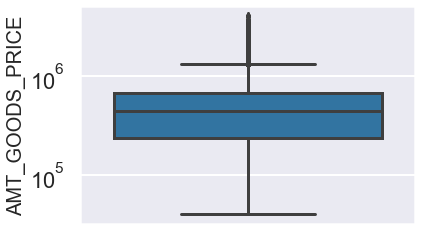

In [227]:
sns.boxplot(y=application_data['AMT_GOODS_PRICE'])
plt.yscale('log')
plt.show()

In [228]:
print(application_data['AMT_GOODS_PRICE'].describe())
print(application_data['AMT_GOODS_PRICE'].median())
print(application_data['AMT_GOODS_PRICE'].mean())
print(application_data['AMT_GOODS_PRICE'].max())
print(application_data['AMT_GOODS_PRICE'].min())
print(application_data['AMT_GOODS_PRICE'].mode())


count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
450000.0
538396.2074288895
4050000.0
40500.0
0    450000.0
Name: AMT_GOODS_PRICE, dtype: float64


In [229]:
##### As missing values are comparitively less, we will impute missing values with "unknown"
application_data.AMT_GOODS_PRICE= application_data.AMT_GOODS_PRICE.replace(np.nan, "Unknown")


In [230]:
### Missing values of Name_type_suite occured because customers might not have entered their companion type. Hence will impute them with "Unaccompanied"
application_data.NAME_TYPE_SUITE= application_data.NAME_TYPE_SUITE.replace(np.nan, "Unaccompanied")

In [231]:
application_data.isnull().sum().head(50)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [232]:
## Dealing with OCCUPATION_type missing values
application_data.OCCUPATION_TYPE= application_data.OCCUPATION_TYPE.replace(np.nan, "Unknown")
application_data.isnull().sum().head(50)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [233]:
# We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_data.drop(labels=unwanted,axis=1,inplace=True)

In [234]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

In [235]:
# Removing rows having null values greater than or equal to 30%

Removingnulls=application_data.isnull().sum(axis=1)
Removingnulls=list(Removingnulls[Removingnulls.values>=0.3*len(application_data)].index)
application_data.drop(labels=Removingnulls,axis=0,inplace=True)
print(len(Removingnulls))

0


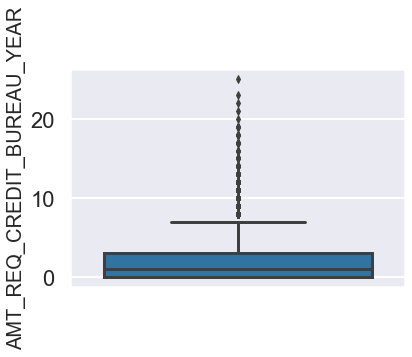

In [236]:
sns.boxplot(y=application_data['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

In [237]:
print(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median())
print(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean())
print(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].min())
print(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].max())

1.0
1.899974435321363
0.0
25.0


In [238]:
# Replacing AMT_REQ_CREDIT_BUREAU_YEAR with median value as there are outliers

values=application_data['AMT_REQ_CREDIT_BUREAU_QRT'].median()
application_data.loc[application_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull(),'AMT_REQ_CREDIT_BUREAU_QRT']=values


In [239]:
application_data.isnull().sum()/len(application_data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

In [240]:
## Removing rows which has less percent of null values. 
application_data = application_data[~application_data.EXT_SOURCE_2.isnull()]

In [241]:
application_data = application_data[~application_data.OBS_30_CNT_SOCIAL_CIRCLE.isnull()]
application_data = application_data[~application_data.DEF_30_CNT_SOCIAL_CIRCLE.isnull()]
application_data = application_data[~application_data.OBS_60_CNT_SOCIAL_CIRCLE.isnull()]
application_data = application_data[~application_data.DEF_60_CNT_SOCIAL_CIRCLE.isnull()]
application_data = application_data[~application_data.OBS_30_CNT_SOCIAL_CIRCLE.isnull()]

In [242]:
## We do not need AMT_REQ_CREDIT_BUREAU_HOUR and AMT_REQ_CREDIT_BUREAU_DAY for this analysis. Hence we will drop them
application_data= application_data.drop(["AMT_REQ_CREDIT_BUREAU_HOUR"] , axis= 1)

In [243]:
application_data= application_data.drop(["AMT_REQ_CREDIT_BUREAU_DAY"] , axis= 1)

In [244]:
values=application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median()
application_data.loc[application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull(),'AMT_REQ_CREDIT_BUREAU_WEEK']=values

In [245]:
# Analysis of code gender
application_data['CODE_GENDER'].value_counts(dropna=False)

F      201294
M      104536
XNA         4
Name: CODE_GENDER, dtype: int64

#### We can see that female (F) is having the majority and there are just 4 rows which are marked as XNA hence we will be replacing these values with F i.e Female.

In [246]:
## replacing XNA with F
application_data.loc[application_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
application_data['CODE_GENDER'].value_counts()

F    201298
M    104536
Name: CODE_GENDER, dtype: int64

In [247]:
# Analysis of Organisation Type as it has XNA values

application_data['ORGANIZATION_TYPE'].value_counts(dropna = False)

Business Entity Type 3    67579
XNA                       55047
Self-employed             38204
Other                     16608
Medicine                  11127
Business Entity Type 2    10502
Government                10356
School                     8860
Trade: type 7              7802
Kindergarten               6850
Construction               6688
Business Entity Type 1     5941
Transport: type 4          5377
Trade: type 3              3464
Industry: type 9           3351
Industry: type 3           3263
Security                   3234
Housing                    2952
Industry: type 11          2691
Military                   2623
Bank                       2478
Agriculture                2444
Police                     2329
Transport: type 2          2197
Postal                     2142
Security Ministries        1962
Trade: type 2              1884
Restaurant                 1805
Services                   1568
University                 1316
Industry: type 7           1301
Transpor

In [248]:
### Lets see that organisation type is the most repeated one.

print(application_data['ORGANIZATION_TYPE'].mode())
print(application_data['ORGANIZATION_TYPE'].describe())

0    Business Entity Type 3
Name: ORGANIZATION_TYPE, dtype: object
count                     305834
unique                        58
top       Business Entity Type 3
freq                       67579
Name: ORGANIZATION_TYPE, dtype: object


In [249]:
application_data=application_data.drop(application_data.loc[application_data['ORGANIZATION_TYPE']=='XNA'].index)
application_data[application_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 41)

#### There are 55374 XNA values which is just 18% of the total count. Hence we drop the XNA rows


In [250]:
application_data.isnull().sum().head(50)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
R

### Standardise values 

In [251]:
## Changing column names
application_data.rename(columns = {'SK_ID_CURR' : 'Loan_ID'}, inplace=True)

In [252]:
application_data.rename(columns = {'CODE_GENDER' : 'Gender'}, inplace=True)
application_data.rename(columns = {'CNT_CHILDREN' : 'No_of_children'}, inplace=True)
application_data.rename(columns = {'WEEKDAY_APPR_PROCESS_START' : 'Application_week'}, inplace=True)
application_data.rename(columns = {'HOUR_APPR_PROCESS_START ' : 'Application_hour'}, inplace=True)





In [253]:
### Casting all variable into numeric in the dataset

numeric_columns=['TARGET','No_of_children','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_data[numeric_columns]=application_data[numeric_columns].apply(pd.to_numeric)
application_data.head(5)

,Loan_ID,TARGET,NAME_CONTRACT_TYPE,Gender,FLAG_OWN_CAR,FLAG_OWN_REALTY,No_of_children,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.650442,NaN,2.0,0.0,2.0,0.0,0.0,NaN,0.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [254]:
# Creating bins for Income range
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [255]:
# Creating bins for Credit Amount
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

In [256]:
# We will divide the dataset into two: 1st dataset will be of people having diffiuclties in paying the loans and 2nd data set will be others
target0 = application_data.loc[application_data["TARGET"]==0]
target1 = application_data.loc[application_data["TARGET"]==1]

In [257]:
round(len(target0)/len(target1),2)

10.52

### Categorical Univariate Analysis

In [258]:
# Function for plotting the data

def plotfunc(df,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
    plt.show()

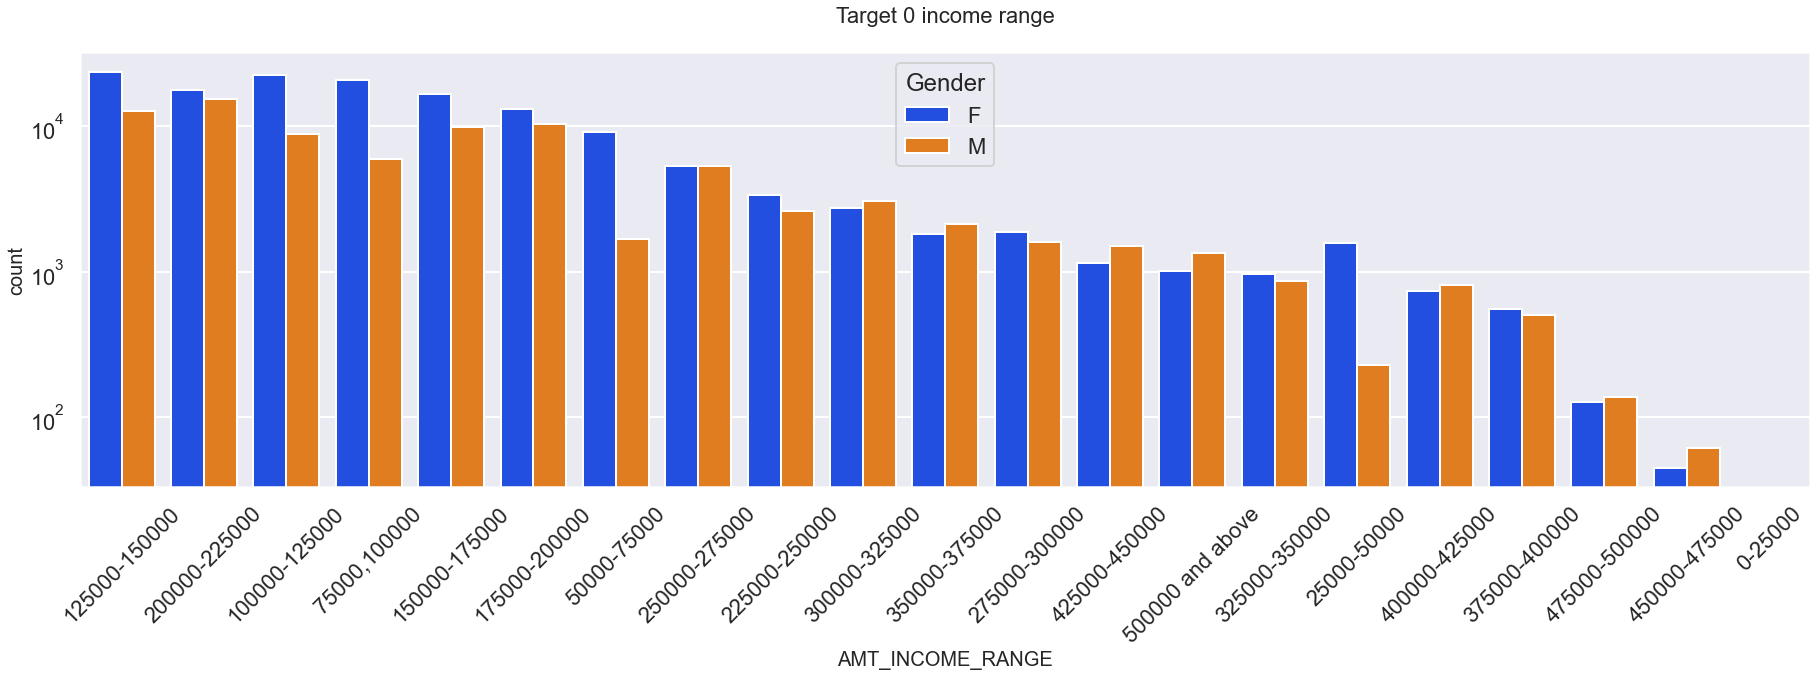

In [259]:
# Plotting income with target variable
Non_defaulter= plotfunc(target0,col='AMT_INCOME_RANGE',title='Target 0 income range',hue='Gender')

Points to note:
Females are less non defaulters comapred to men


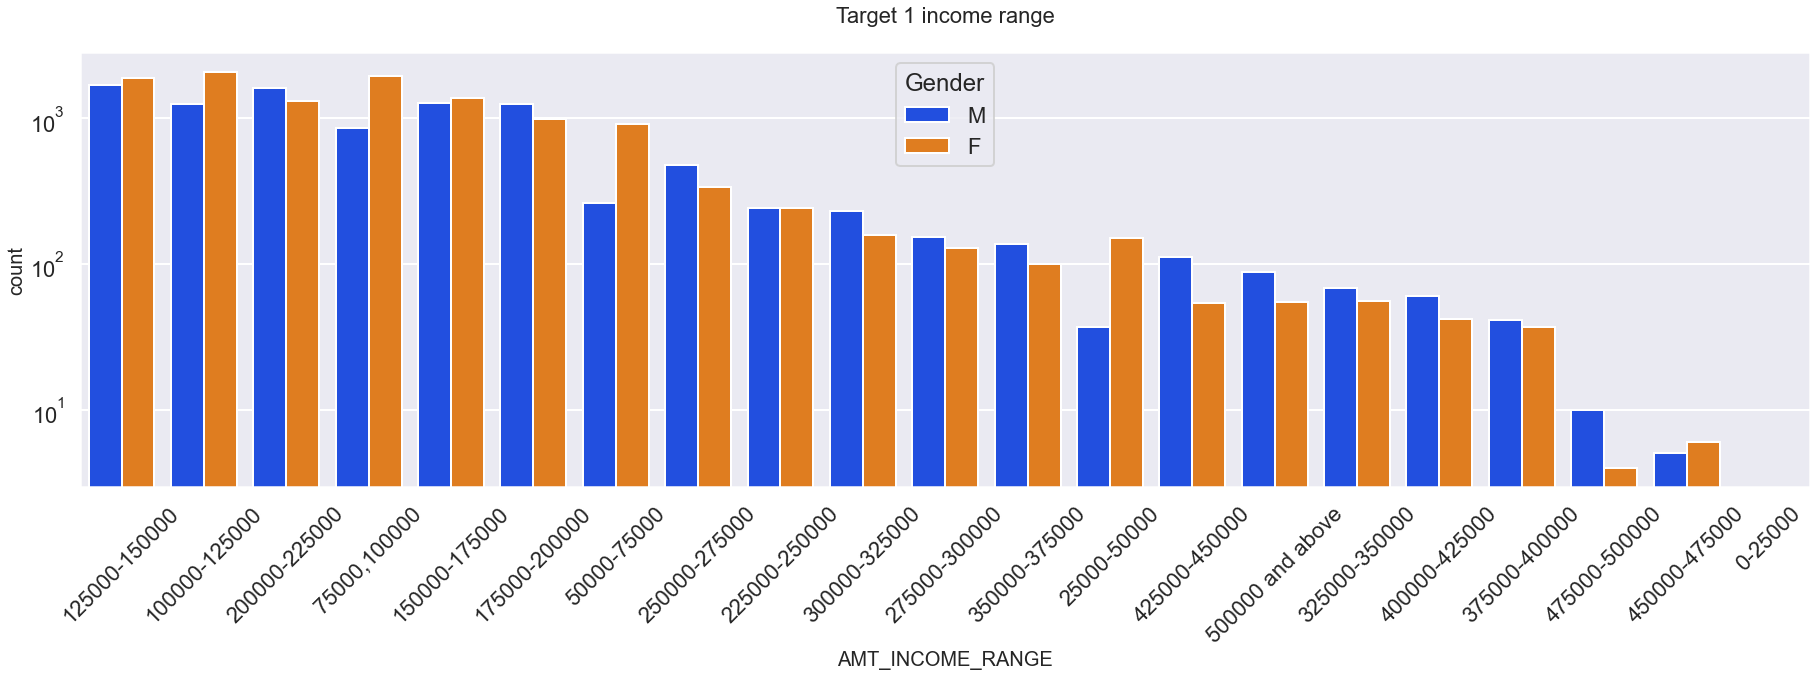

In [260]:
# plotting income with target 1 i.e defaulters
plotfunc(target1,col='AMT_INCOME_RANGE',title='Target 1 income range',hue='Gender')

Points to note: Again in defaulter case females are having high defaulting rate.

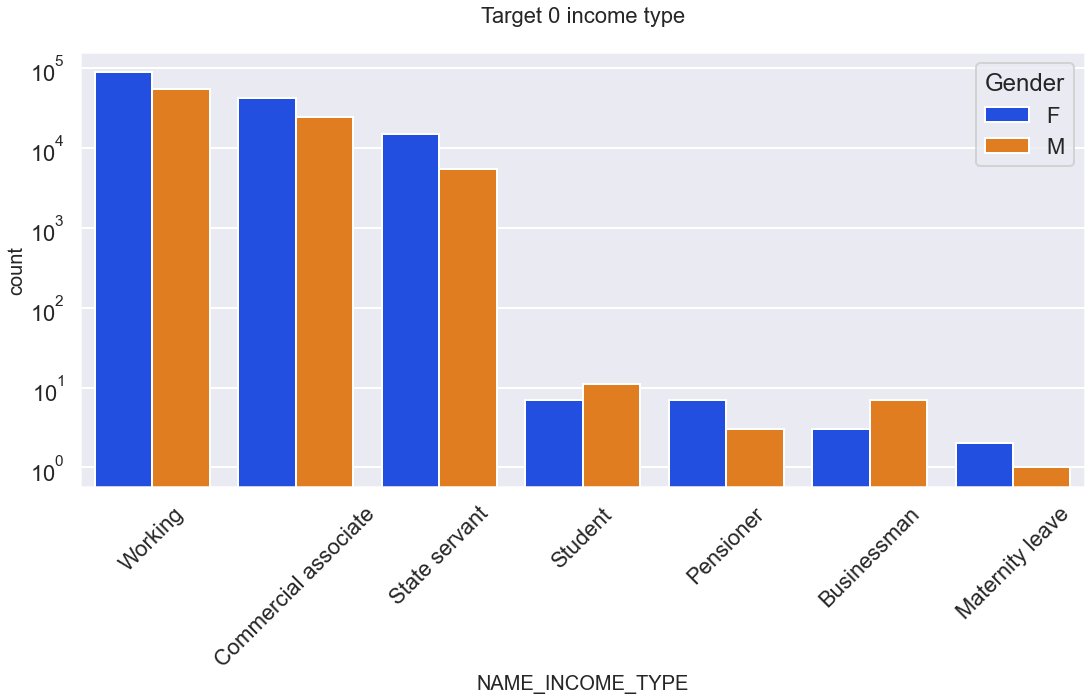

In [261]:
plotfunc(target0,col='NAME_INCOME_TYPE',title='Target 0 income type',hue='Gender')

Working females,commercial associate females, state servents females, Pensioner females have less tendency to default

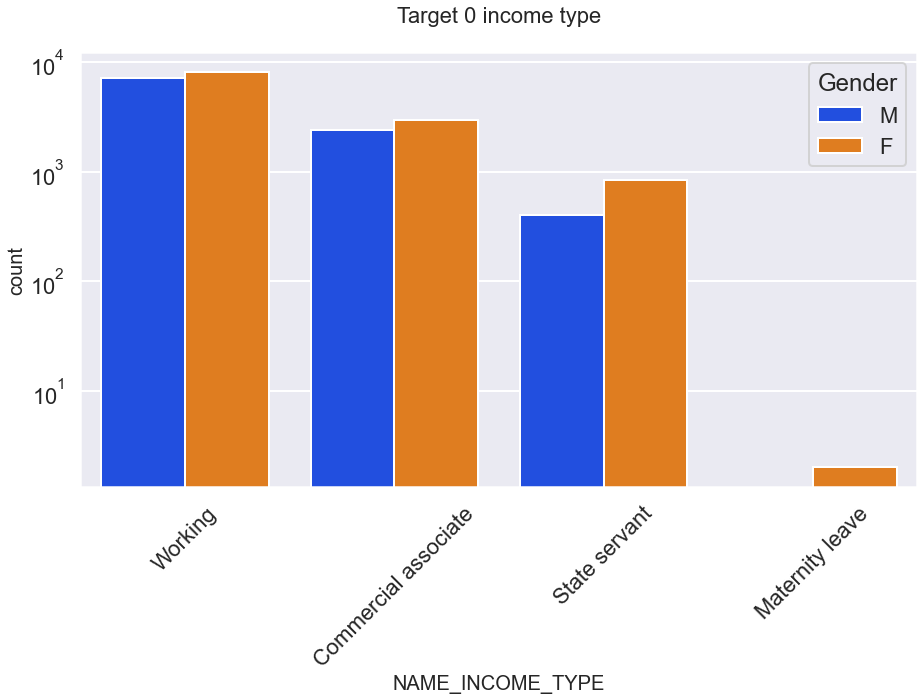

In [262]:
plotfunc(target1,col='NAME_INCOME_TYPE',title='Target 0 income type',hue='Gender')

Working, commercial associate, State servant males have high rate of defaulting

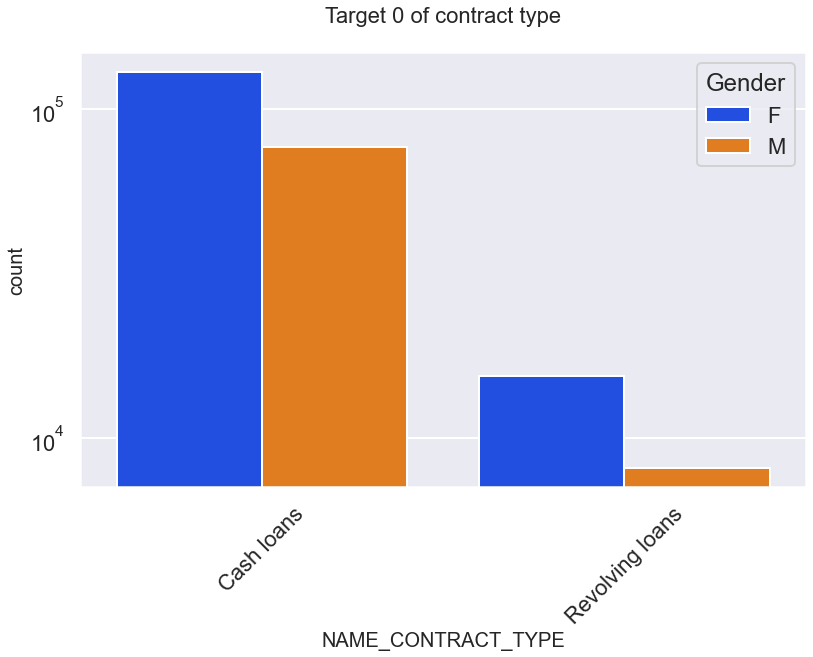

In [263]:
# Plotting contract type with target 0
plotfunc(target0,col='NAME_CONTRACT_TYPE',title='Target 0 of contract type',hue='Gender')

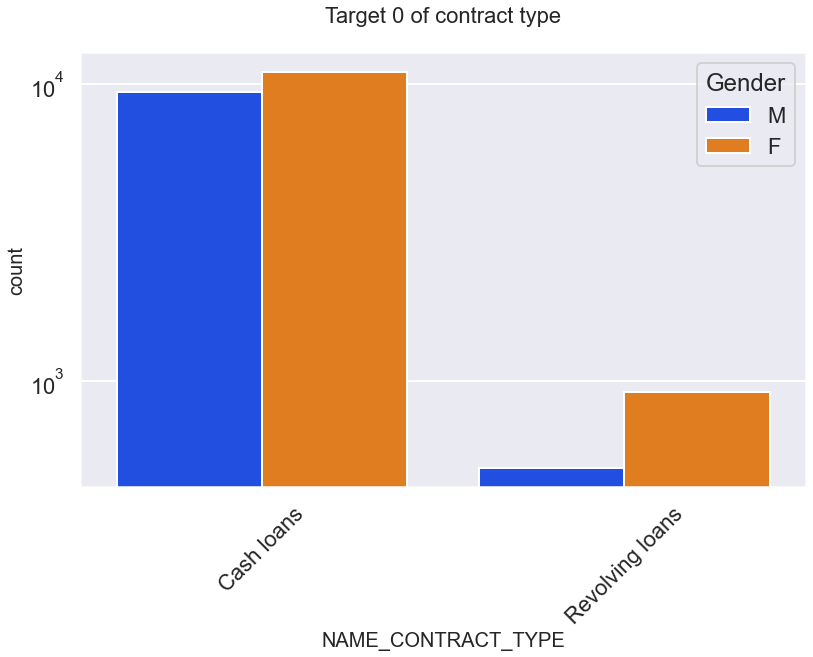

In [264]:
plotfunc(target1,col='NAME_CONTRACT_TYPE',title='Target 0 of contract type',hue='Gender')

### Plotting with education_type and target 0 and target 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


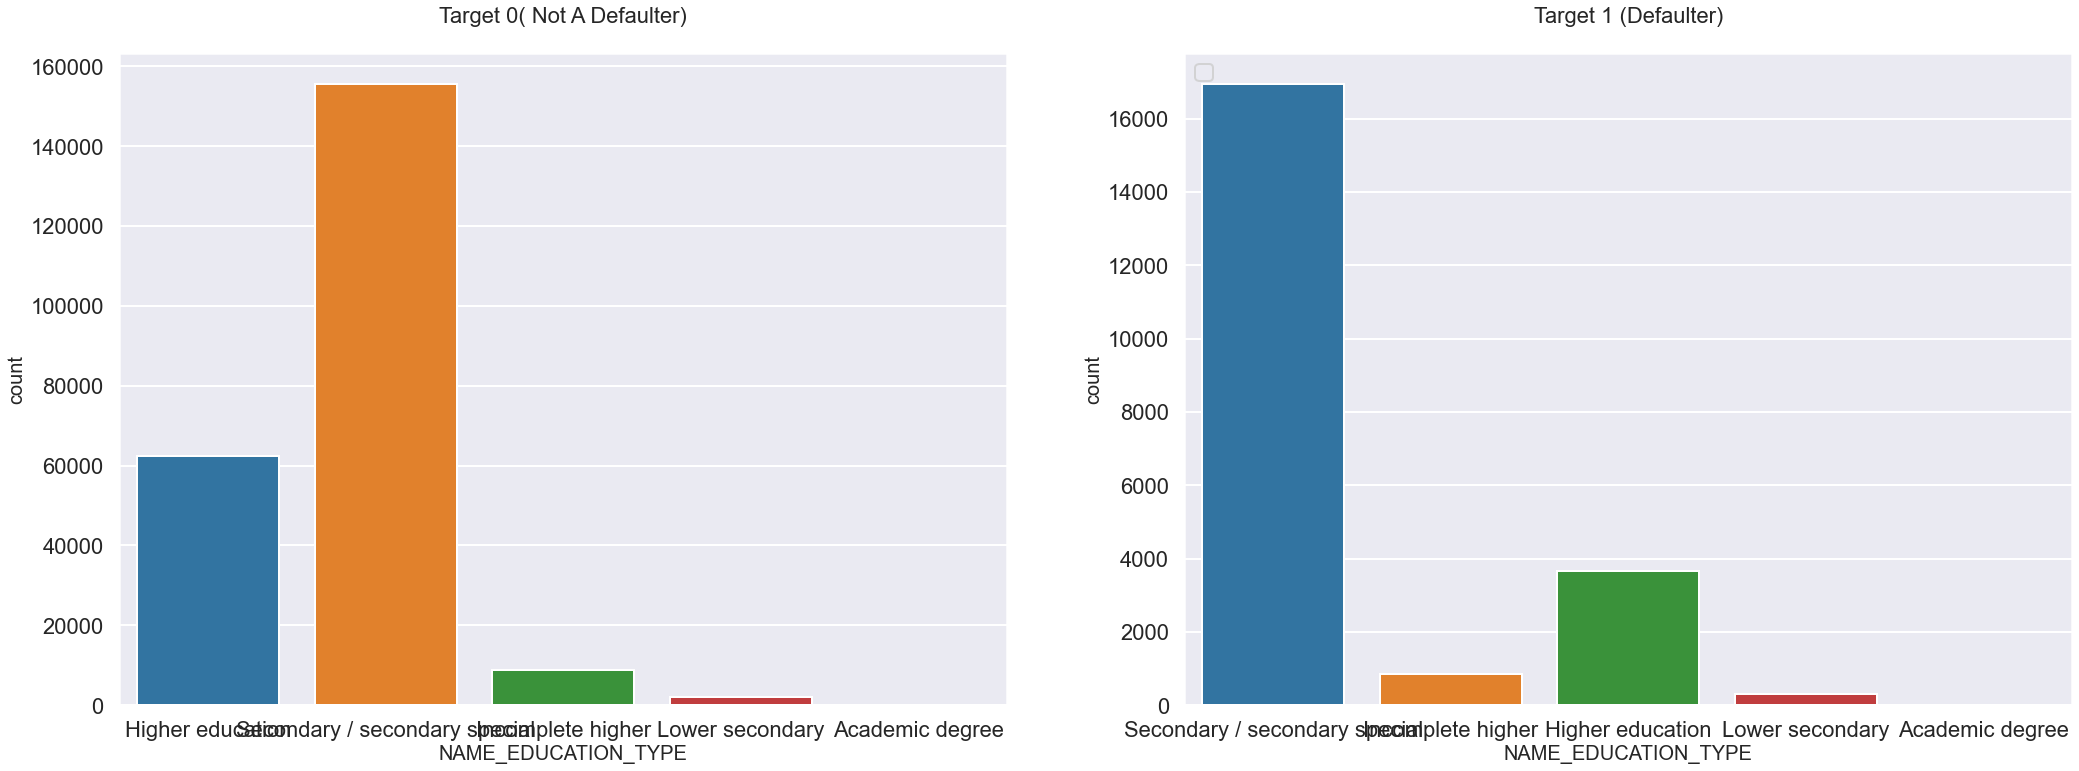

In [265]:
fig, ax =plt.subplots(1,2,figsize=(35,12))
sns.countplot(target0['NAME_EDUCATION_TYPE'], ax=ax[0],).set_title('Target 0( Not A Defaulter)')
sns.countplot(target1['NAME_EDUCATION_TYPE'], ax=ax[1]).set_title('Target 1 (Defaulter)')
plt.legend(loc="upper left")
fig.show()

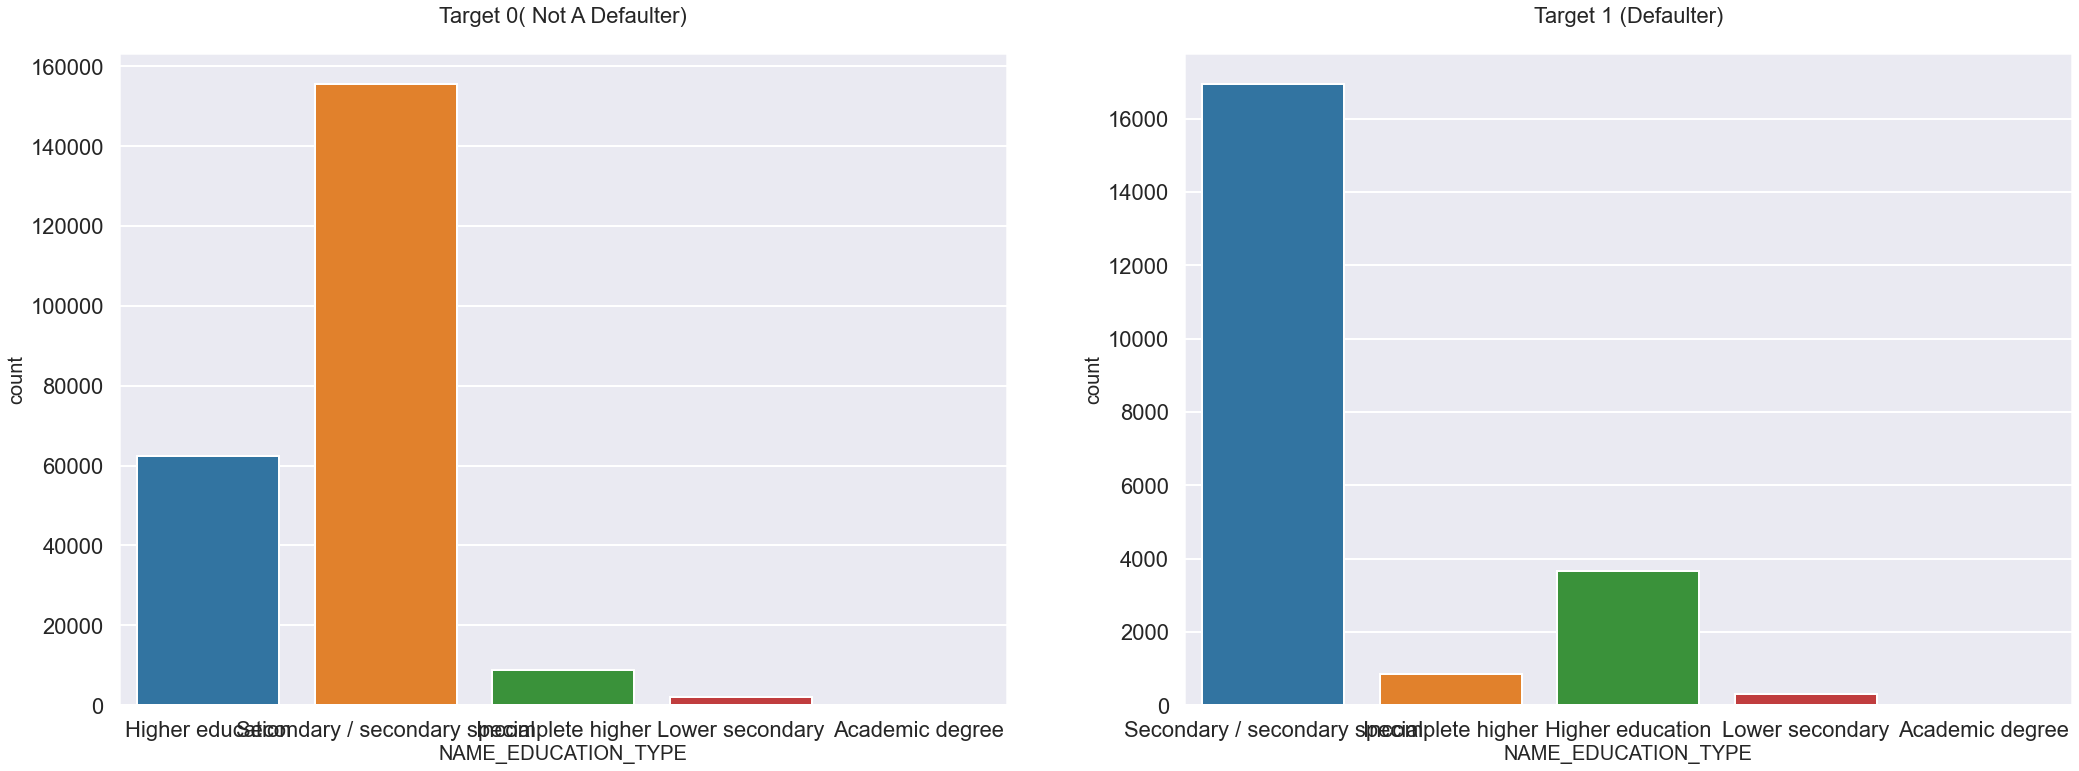

In [266]:
fig, ax =plt.subplots(1,2,figsize=(35,12))
sns.countplot(target0['NAME_EDUCATION_TYPE'], ax=ax[0],).set_title('Target 0( Not A Defaulter)')
sns.countplot(target1['NAME_EDUCATION_TYPE'], ax=ax[1]).set_title('Target 1 (Defaulter)')
fig.show()

Points to be notes: People with secondary education has defaulted the most

### Bivariate Analysis

Analysing correlation for numerical columns for both target 0 and 1

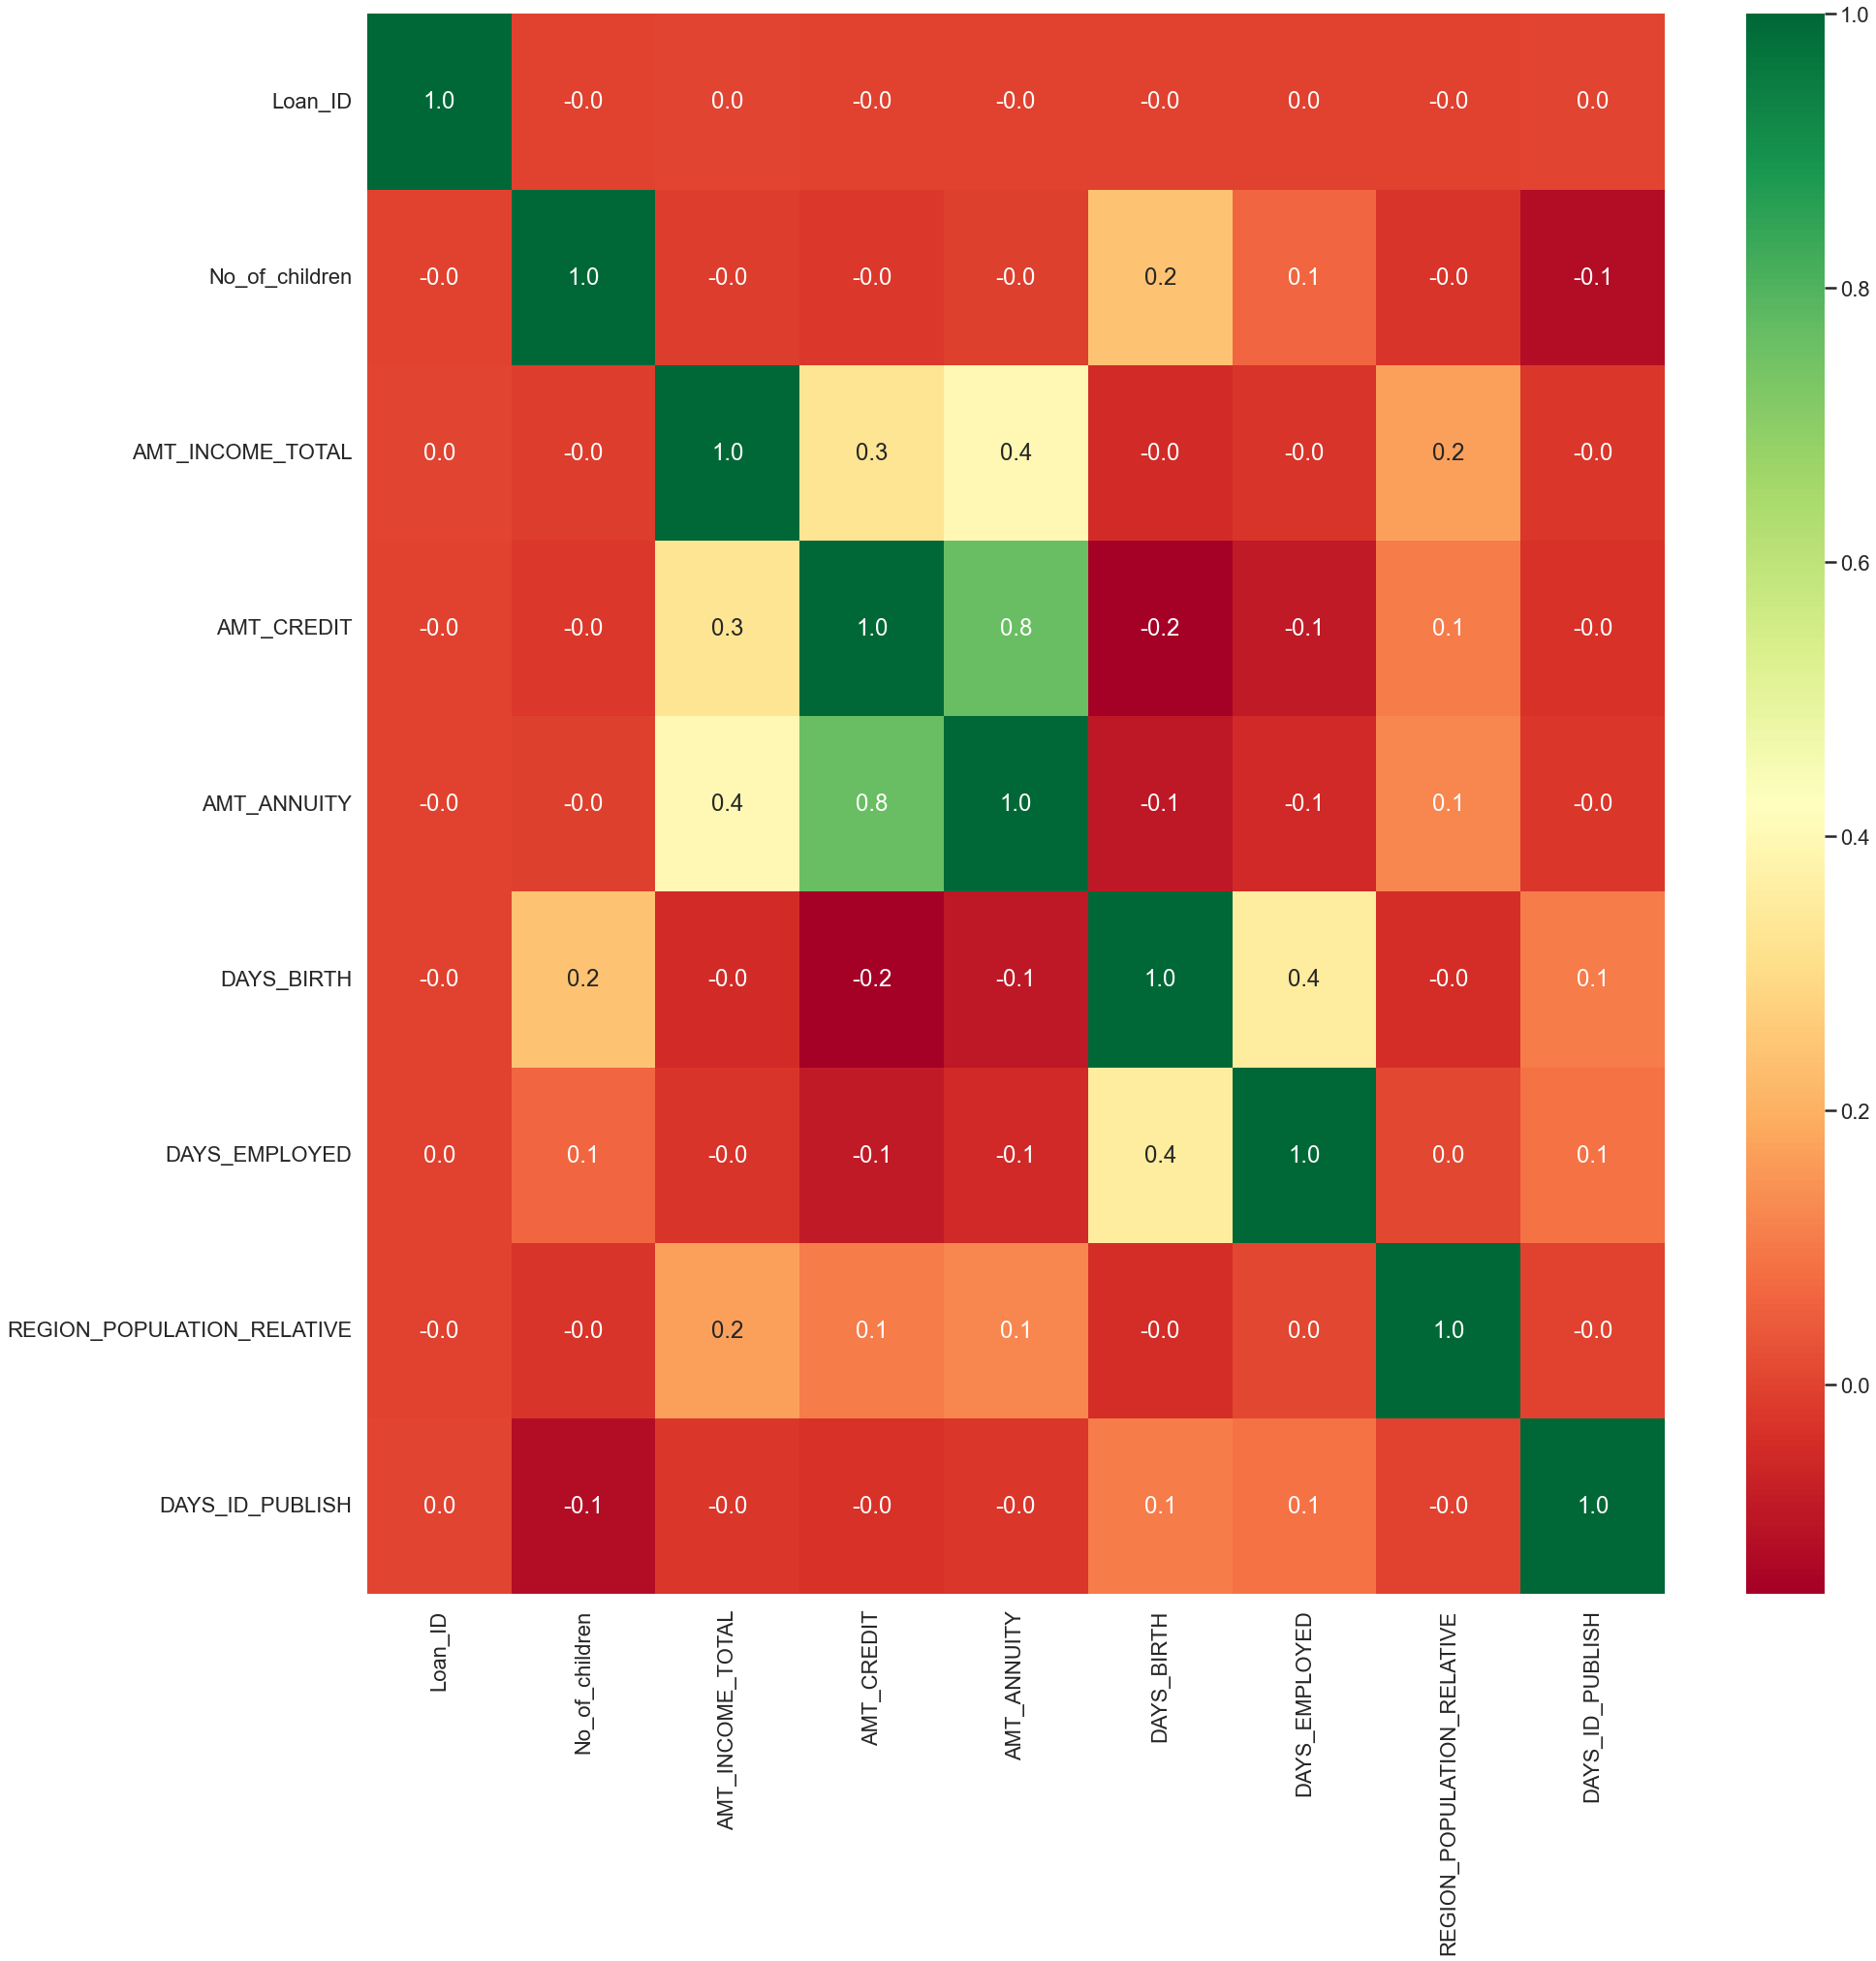

In [267]:
d=target0[['Loan_ID','No_of_children','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
plt.figure(figsize=(30,30))

sns.heatmap(d.corr(), fmt='.1f', cmap="RdYlGn", annot=True)
plt.show()

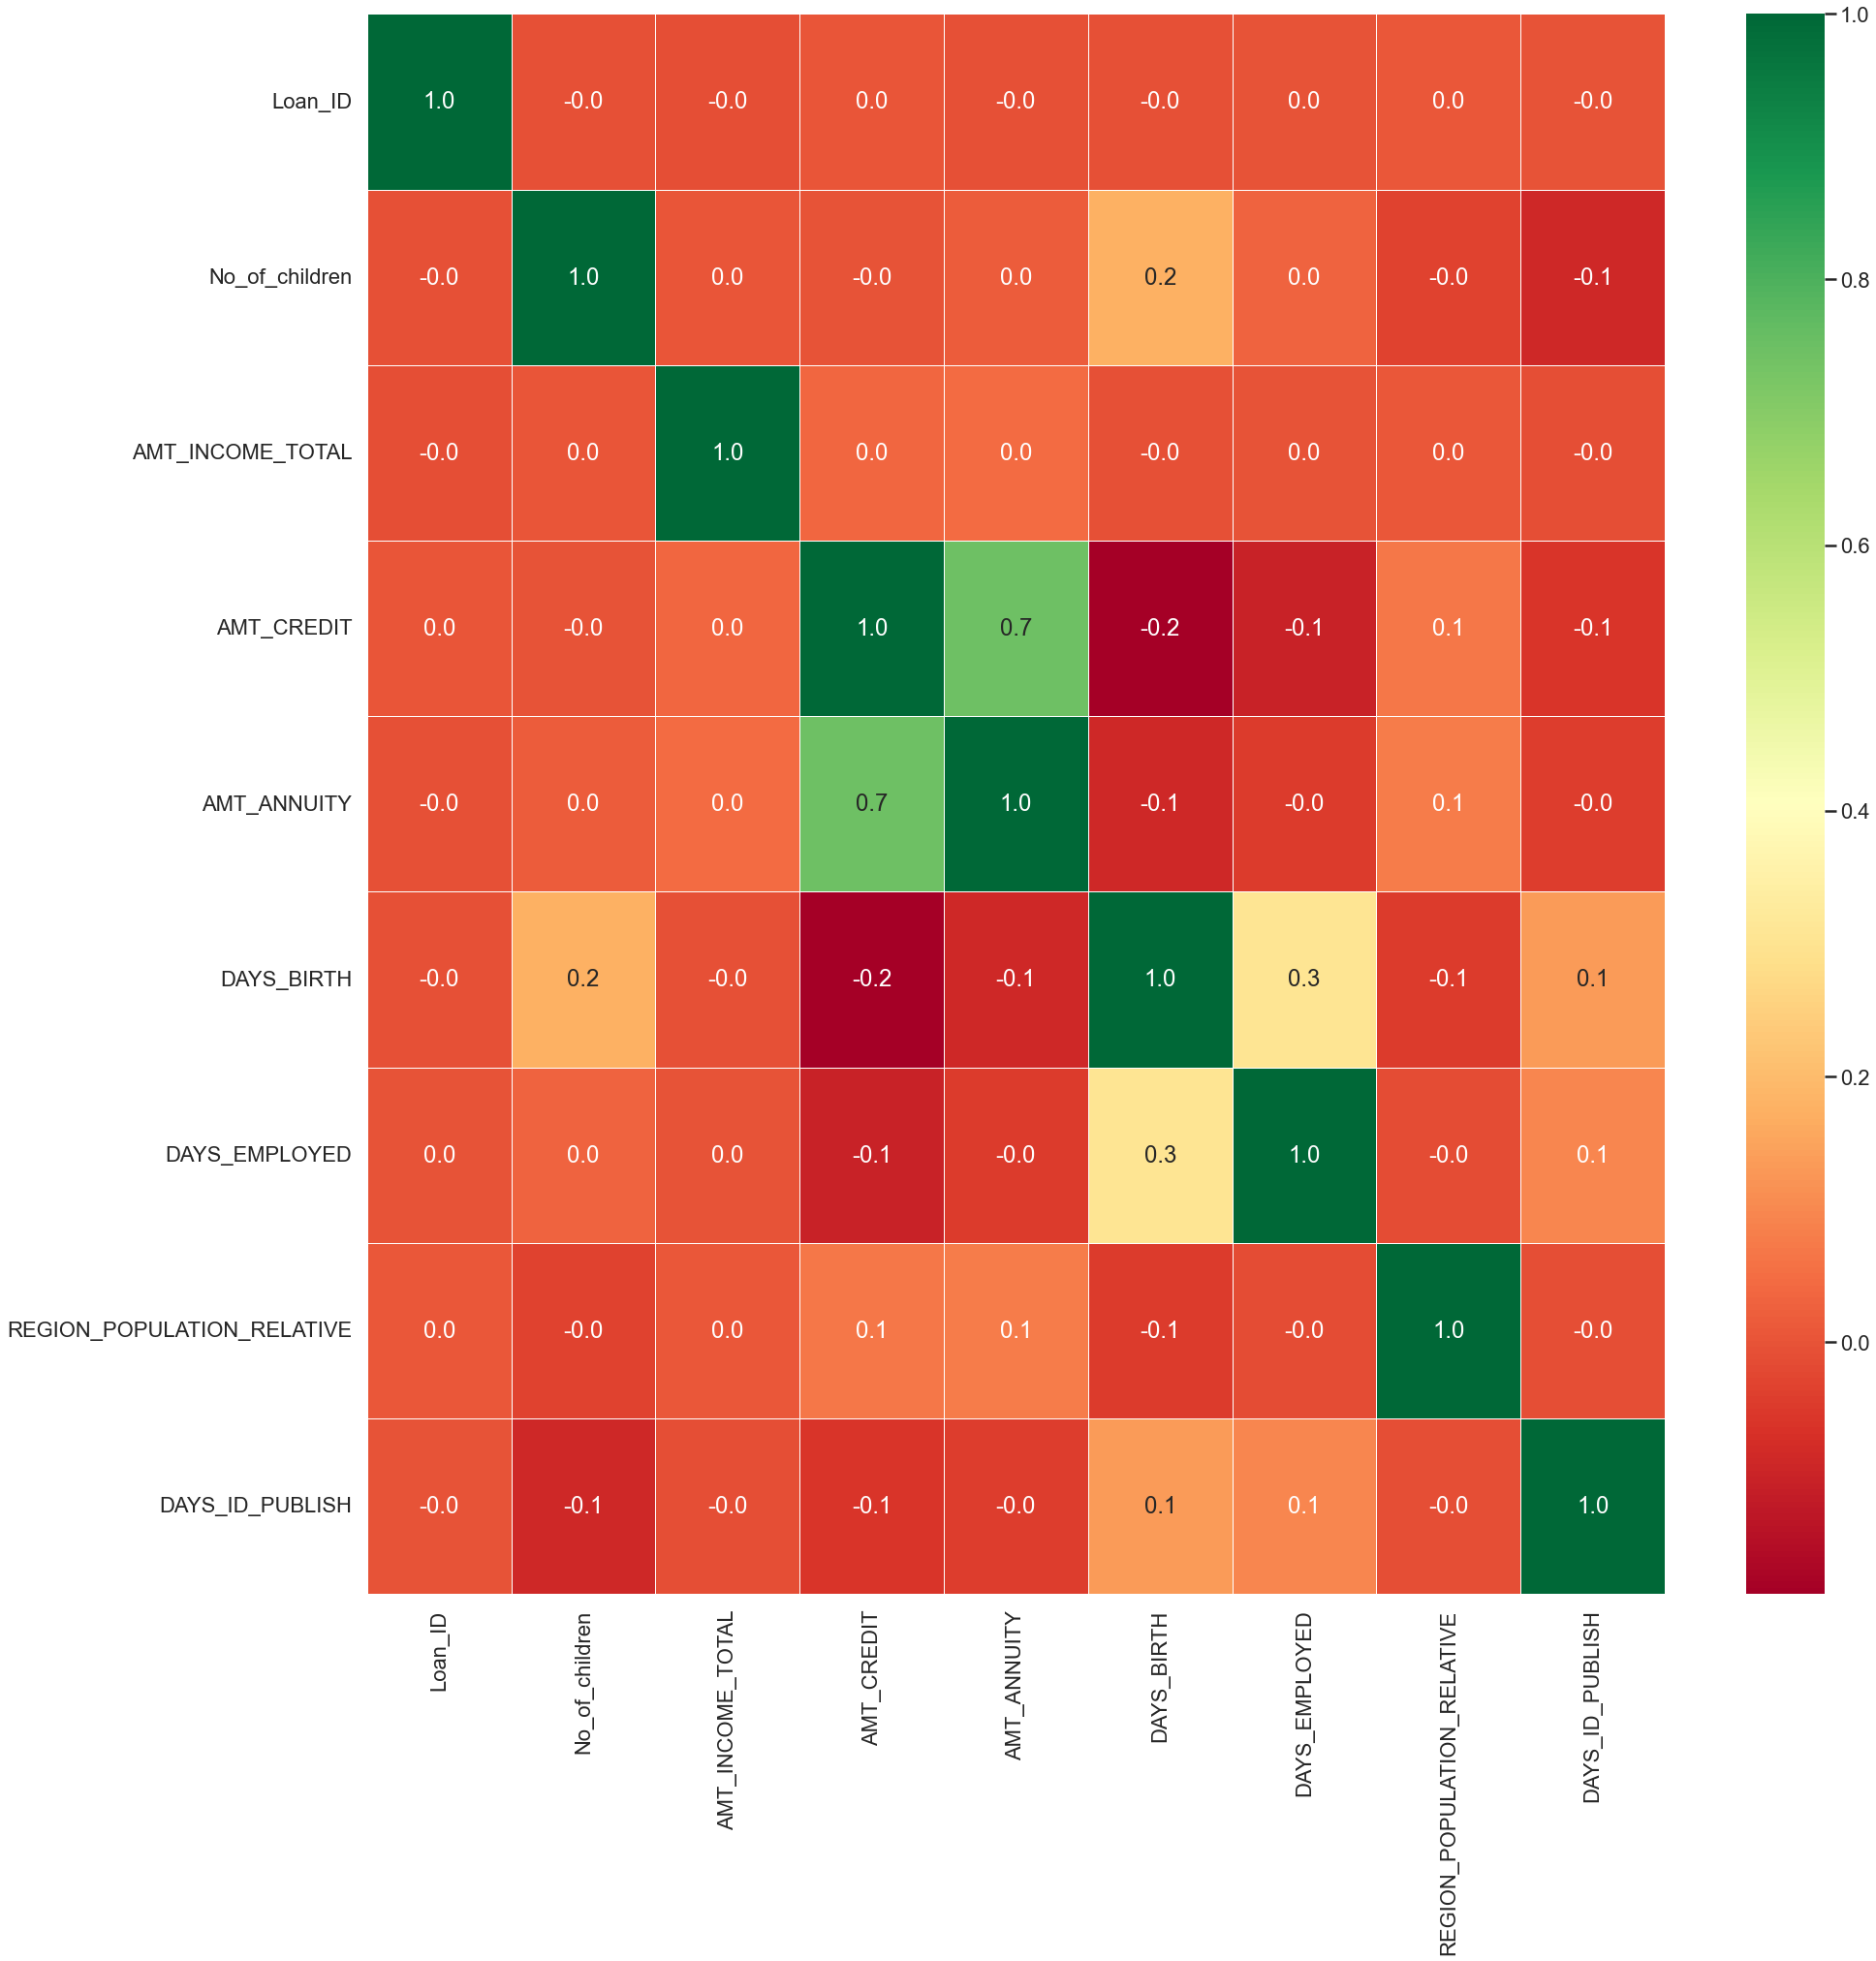

In [268]:
d=target1[['Loan_ID','No_of_children','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
#plt.figure(figsize=(15,10))

#sns.heatmap(d.corr(), cmap="YlGnBu", annot=True)

f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(d.corr(), annot=True, fmt='.1f',cmap="RdYlGn", linewidths=.5, ax=ax)

plt.show()

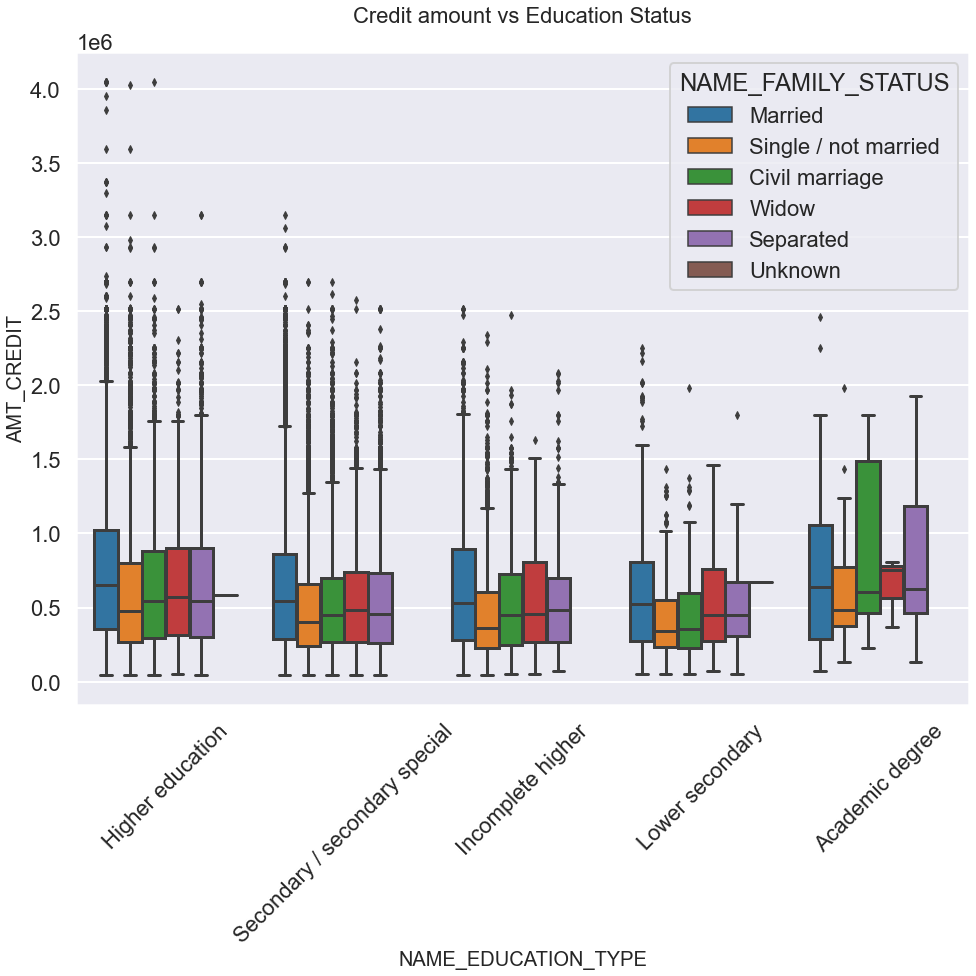

In [269]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credit amount loans. And family status of higher education and many outliers. Civil marriage is haivng the most number of credit amount. 

Target 1


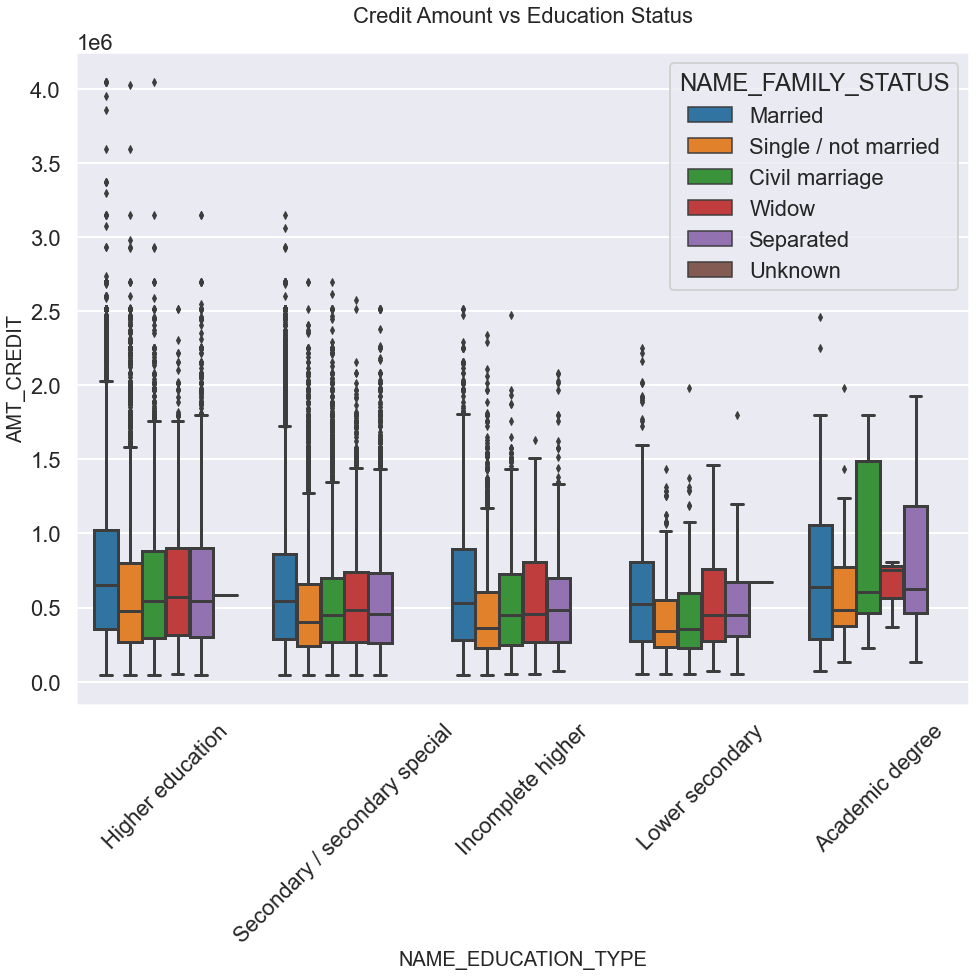

In [270]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Quite similar with Target 0 From the above box plot 

##### Analysing previous data

In [271]:
previous_data.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
## Changing column names to merge with application_data
previous_data.rename(columns = {'Login_ID' : 'Loan_ID'}, inplace=True)

In [278]:
# Cleaning the data
emptycol1=previous_data.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [279]:
# Dropping columns which has more than 30% missing data
emptycol1 = list(emptycol1[emptycol1.values>0.3].index)
previous_data.drop(labels=emptycol1,axis=1,inplace=True)
    


In [285]:
previous_data.rename(columns = {'SK_ID_CURR' : 'Loan_ID'}, inplace=True)

In [282]:
# Removing columns which has XNA

previous_data=previous_data.drop(previous_data[previous_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_data=previous_data.drop(previous_data[previous_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
previous_data=previous_data.drop(previous_data[previous_data['CODE_REJECT_REASON']=='XAP'].index)



In [286]:
# Now merging the application data with previous data
new_df=pd.merge(left=application_data,right=previous_data,how='inner',on='Loan_ID')

In [290]:
new_df.isnull().sum().head(50)

Loan_ID                           0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
Gender                            0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
No_of_children                    0
AMT_INCOME_TOTAL                  0
AMT_CREDIT_x                      0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE                   0
Application_week                  0
HOUR_APPR_PROCESS_START_x         0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY      

In [293]:
new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [299]:
new_df1.drop(['Loan_ID'],axis=1)


,TARGET,NAME_CONTRACT_TYPE_x,Gender,FLAG_OWN_CAR,FLAG_OWN_REALTY,No_of_children,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
1,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
2,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,666000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
3,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,666000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
4,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,666000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30611,0,Cash loans,F,N,Y,0,225000.0,1125000.0,40540.5,1125000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,middle
30612,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,450000.0,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
30613,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,450000.0,...,XNA,LIMIT,Repeater,XNA,Cash,walk-in,Contact center,-1,XNA,middle
30614,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,1575000.0,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [302]:
new_df1.drop(['WEEKDAY_APPR_PROCESS_START'],axis=1)
new_df1.drop(['REG_REGION_NOT_LIVE_REGION'],axis=1)


,Loan_ID,TARGET,NAME_CONTRACT_TYPE_x,Gender,FLAG_OWN_CAR,FLAG_OWN_REALTY,No_of_children,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
1,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
2,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
3,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
4,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30611,456218,0,Cash loans,F,N,Y,0,225000.0,1125000.0,40540.5,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,middle
30612,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
30613,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,XNA,LIMIT,Repeater,XNA,Cash,walk-in,Contact center,-1,XNA,middle
30614,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [303]:
new_df1.drop(['REG_REGION_NOT_WORK_REGION'],axis=1)
new_df1.drop(['LIVE_REGION_NOT_WORK_REGION'],axis=1)

,Loan_ID,TARGET,NAME_CONTRACT_TYPE_x,Gender,FLAG_OWN_CAR,FLAG_OWN_REALTY,No_of_children,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
1,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
2,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
3,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
4,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30611,456218,0,Cash loans,F,N,Y,0,225000.0,1125000.0,40540.5,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,middle
30612,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
30613,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,XNA,LIMIT,Repeater,XNA,Cash,walk-in,Contact center,-1,XNA,middle
30614,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [306]:
new_df1.drop(['REG_CITY_NOT_LIVE_CITY'],axis=1)
new_df1.drop(['REG_CITY_NOT_WORK_CITY'],axis=1)
new_df1.drop(['LIVE_CITY_NOT_WORK_CITY'],axis=1)



,Loan_ID,TARGET,NAME_CONTRACT_TYPE_x,Gender,FLAG_OWN_CAR,FLAG_OWN_REALTY,No_of_children,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
1,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
2,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
3,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
4,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30611,456218,0,Cash loans,F,N,Y,0,225000.0,1125000.0,40540.5,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,middle
30612,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
30613,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,XNA,LIMIT,Repeater,XNA,Cash,walk-in,Contact center,-1,XNA,middle
30614,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


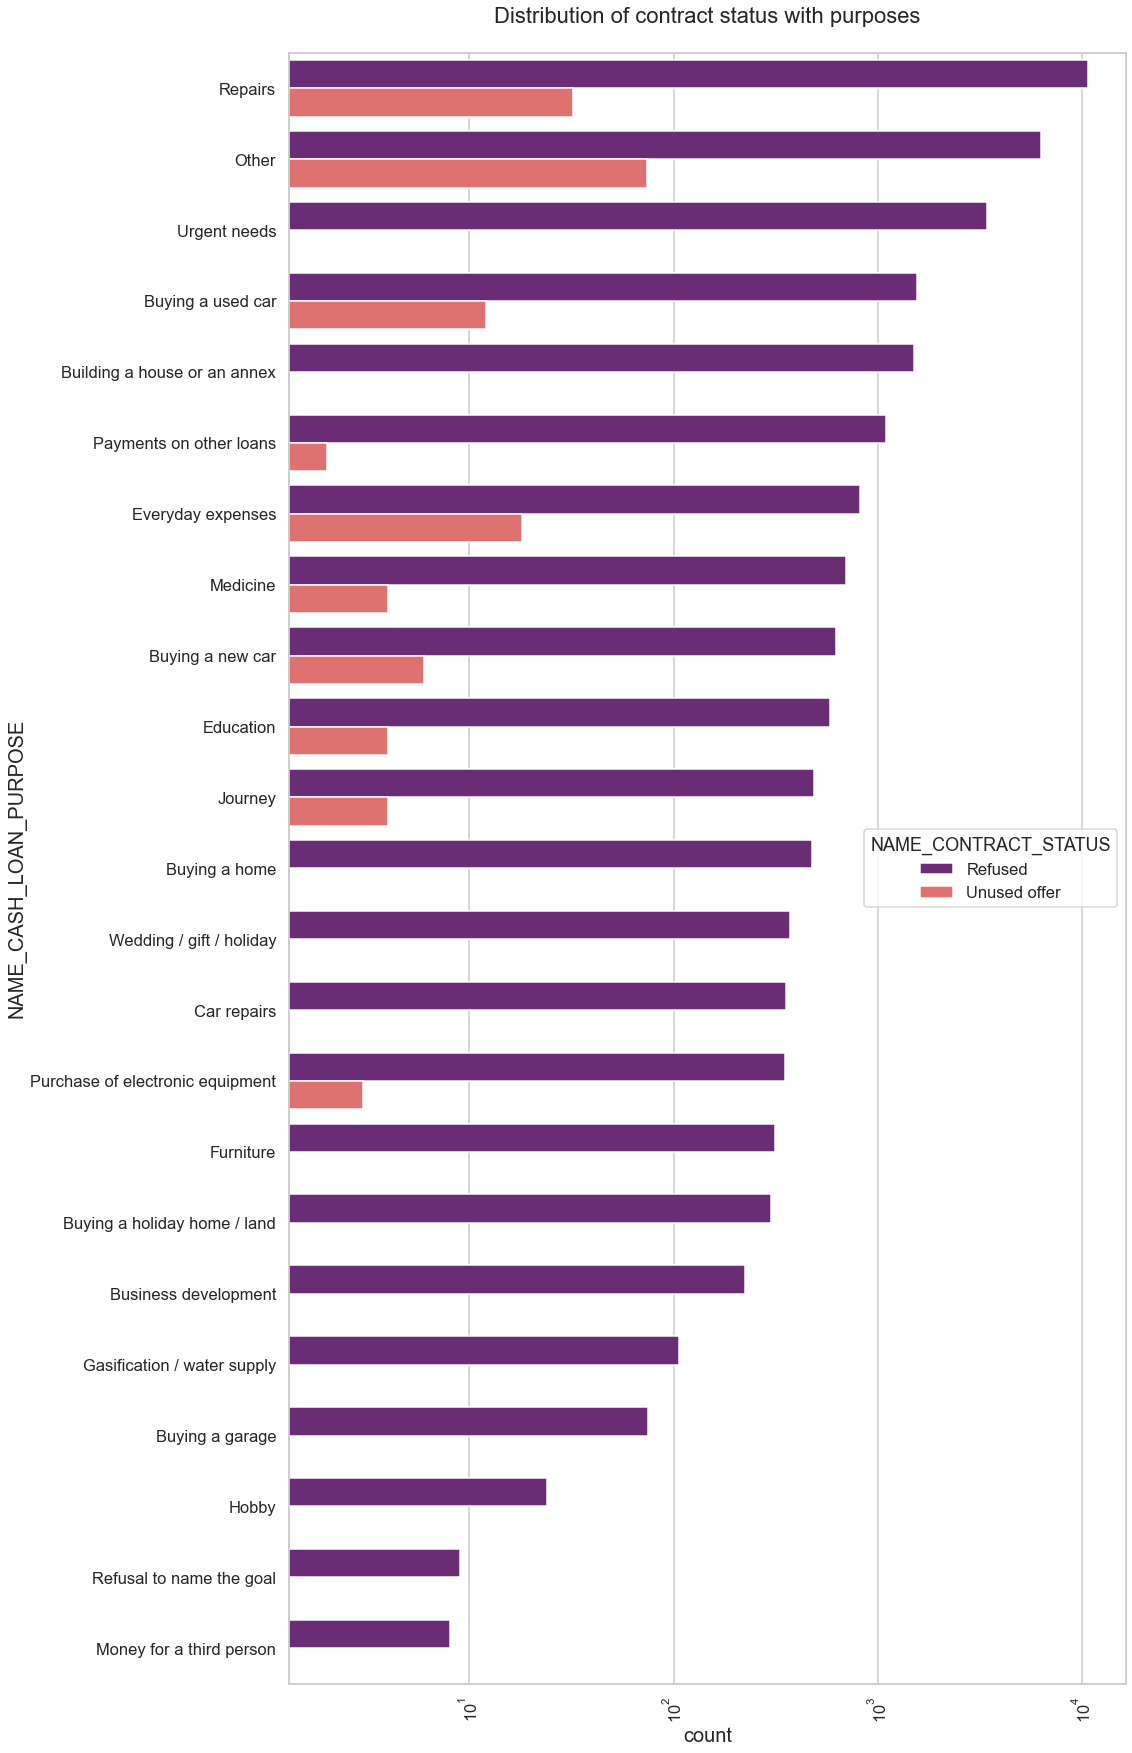

In [307]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

Points to note:
1. Most rejection of loans came from purpose 'repairs'.

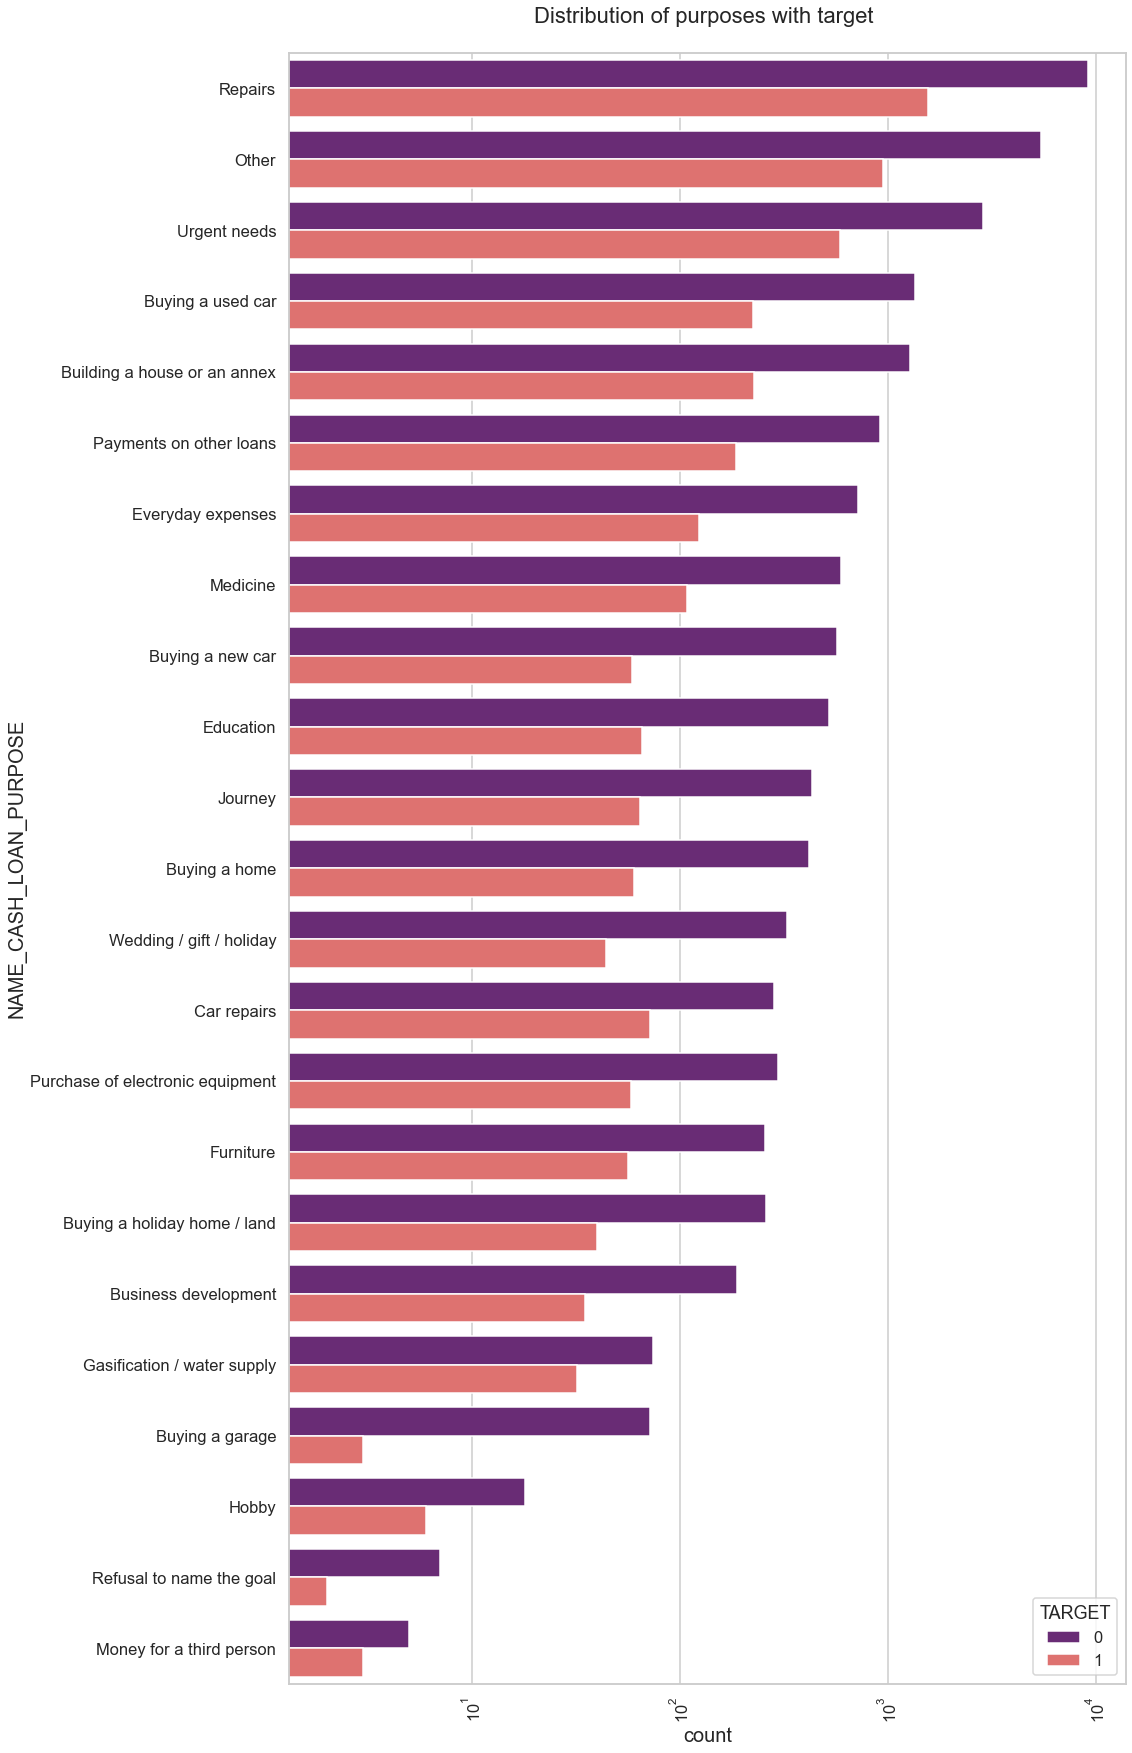

In [308]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

Points to note: 
1. Again we can see repairs have most number of defaults compared to other loan purpose

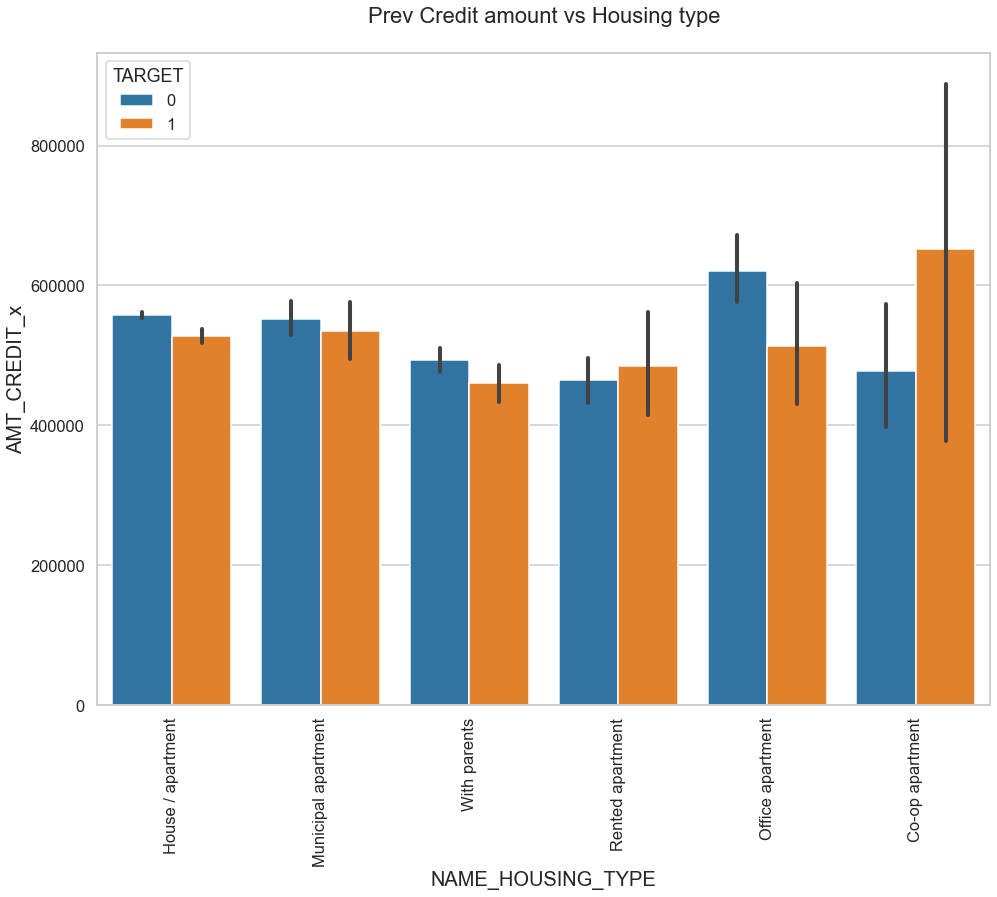

In [314]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Points to note:
1. Co-op apartment has most number of defaults
2. office apartment has most number of non-default cases. 

### Conclusion
1. From the above analysis, banks should avoid giving loans to co-op apartment as they have difficulty in paying loans
2. People living in house/apartment, municipal apartment and office apartment have successful paid loans
3. Loans taken for repairs have most number of defaults compared to other loan purpose
4. Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credit amount loans. 
5. People with secondary education has defaulted the most
6. Working, commercial associate, State servant males have high rate of defaulting